In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importando dados
try:
  # URL
  url = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json"
  response = requests.get(url, timeout=5)
  response.raise_for_status()
  dados = response.json()
  print("Dados carregados com sucesso!")

except requests.HTTPError as e:
  print("Dado não encontrado", e)

# Buscando Dicionário
try:
  url_dict = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/dicionario.md"
  response_dict = requests.get(url_dict)
  response_dict.raise_for_status()
  dicionario = response_dict.text
  print("Dicionário carregado com sucesso!")

except requests.HTTPError as e:
  print("Dicionário não encontrado", e)

Dados carregados com sucesso!
Dicionário carregado com sucesso!


In [3]:
print(dicionario)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

In [4]:
# Criando DF
df = pd.json_normalize(dados)

In [5]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df.columns = df.columns.str.replace(".", "")
df.columns = df.columns.str.replace("phone", "")
df.columns = df.columns.str.replace("customer", "")
df.columns = df.columns.str.replace("internet", "")
df.columns = df.columns.str.replace("account", "")

In [7]:
df.head(10)

,ID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
for coluna in df.columns:
    print(f"Contagem de valores para {coluna}:\n{df[coluna].value_counts()}\n")

Contagem de valores para ID:
ID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Contagem de valores para Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Contagem de valores para gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64

Contagem de valores para SeniorCitizen:
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Contagem de valores para Partner:
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Contagem de valores para Dependents:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Contagem de valores para tenure:
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

Contagem de valores para PhoneService:
PhoneService
Yes    6560
No     

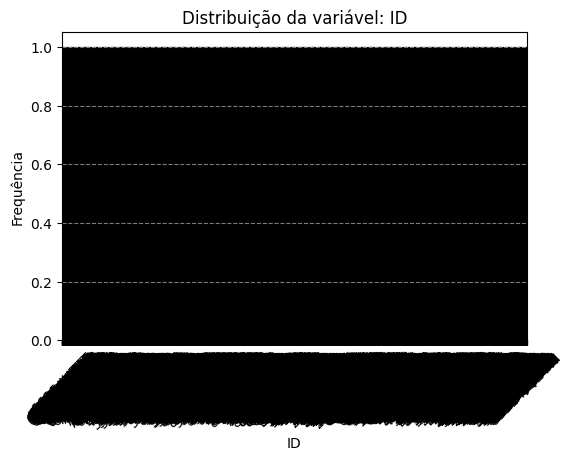

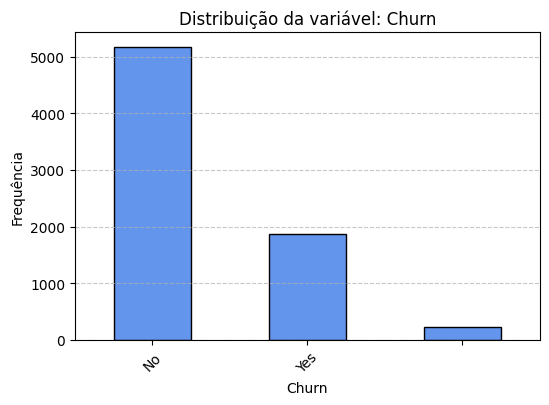

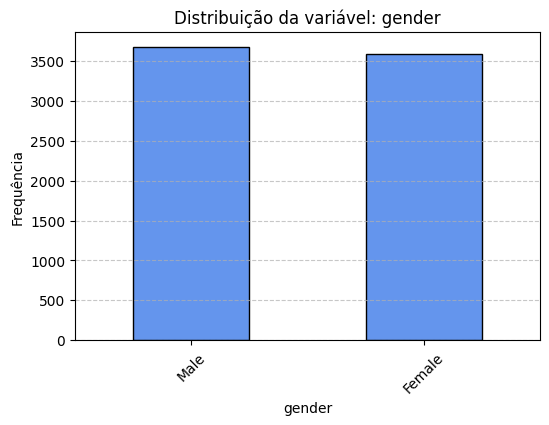

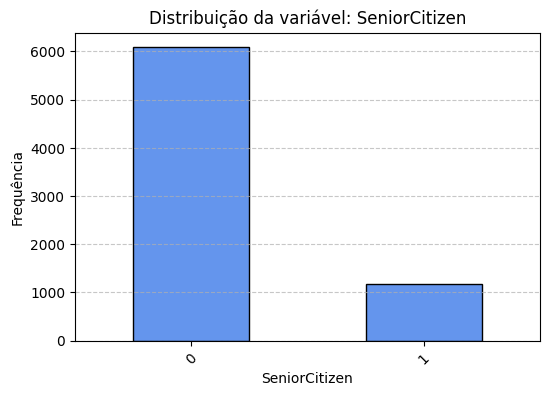

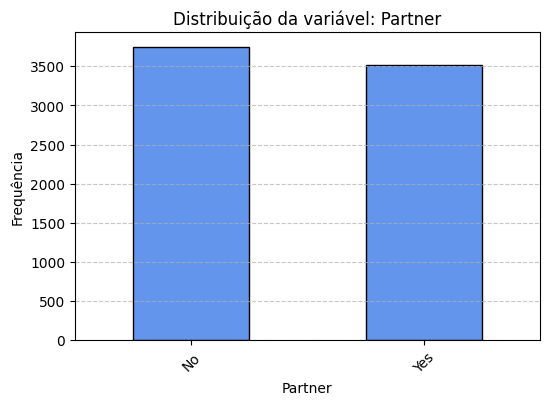

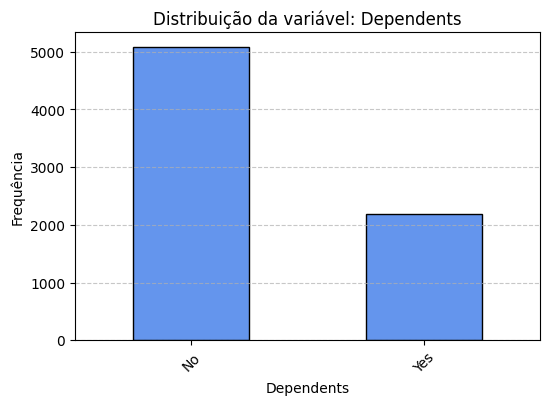

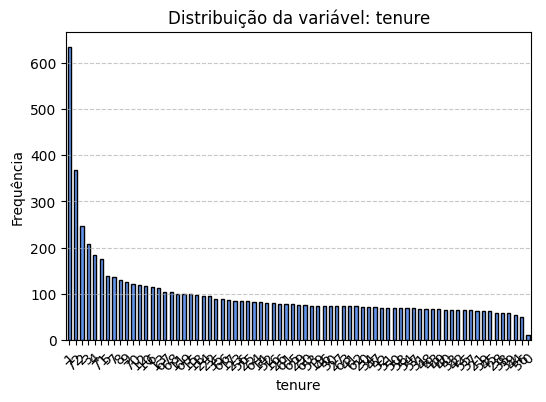

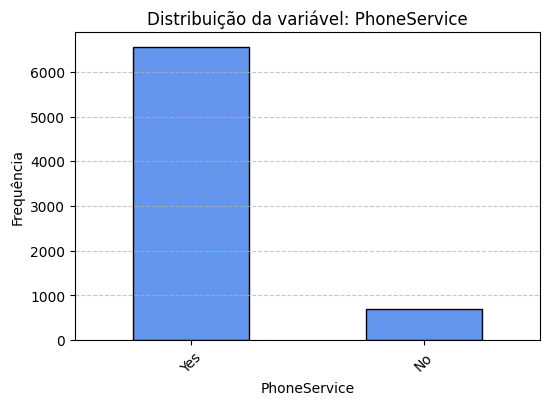

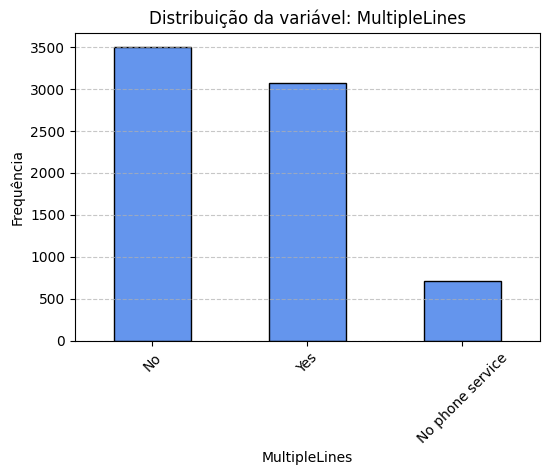

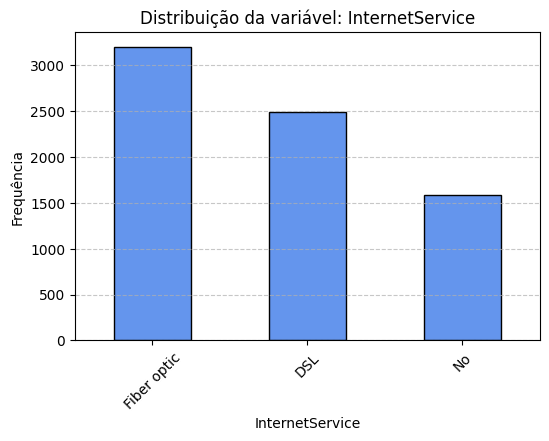

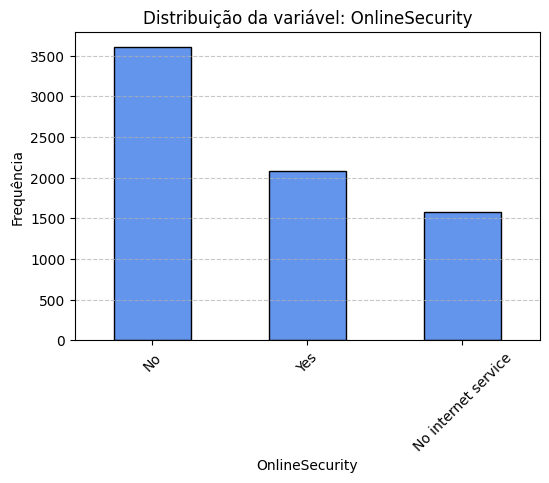

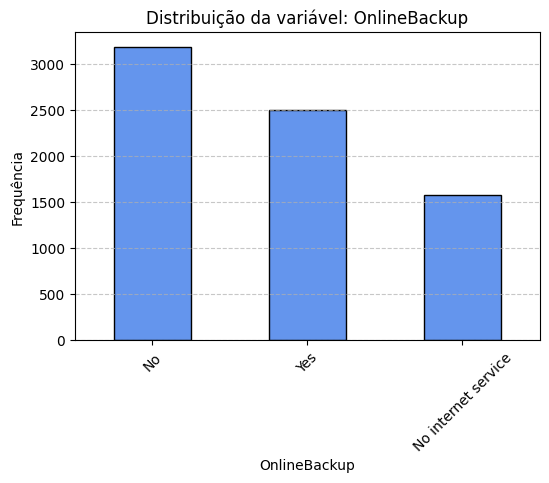

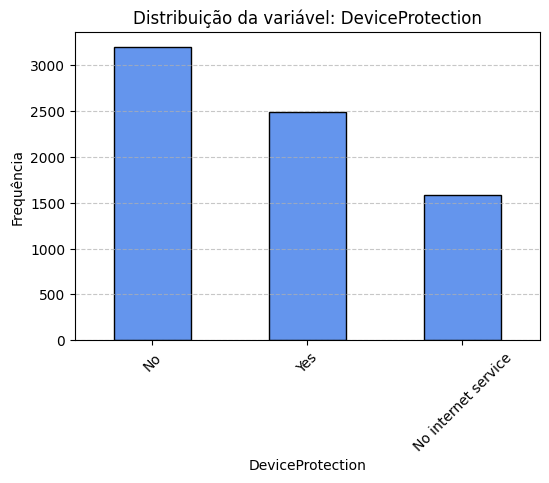

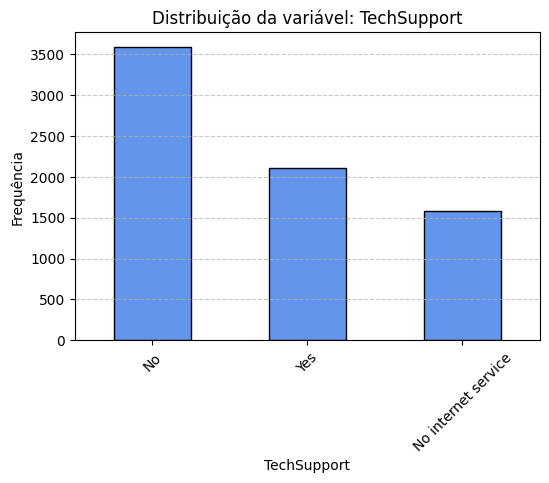

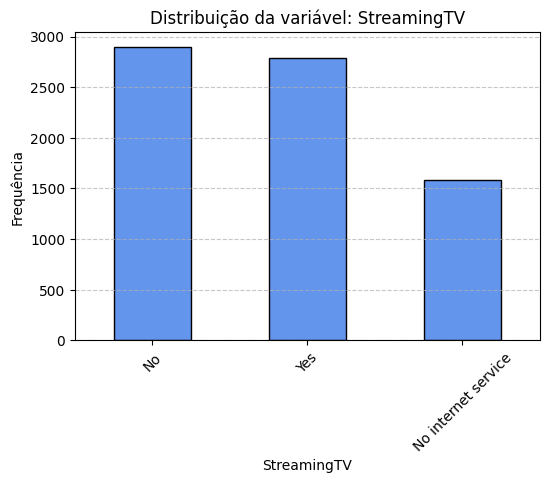

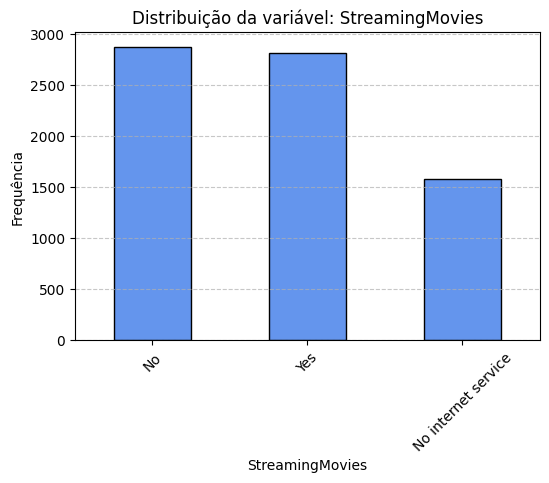

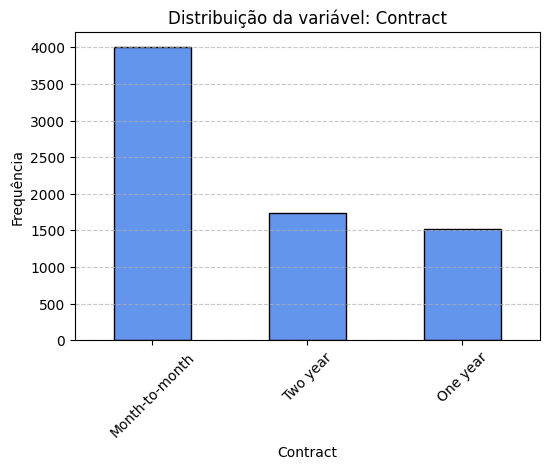

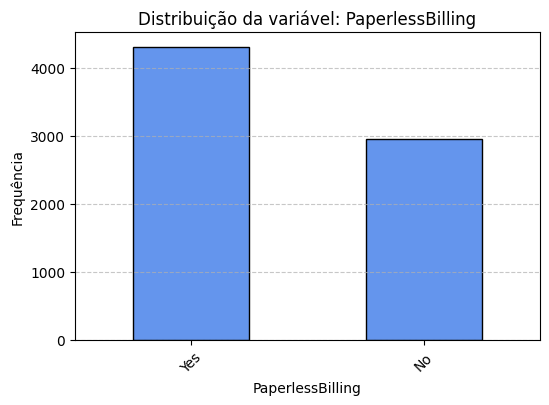

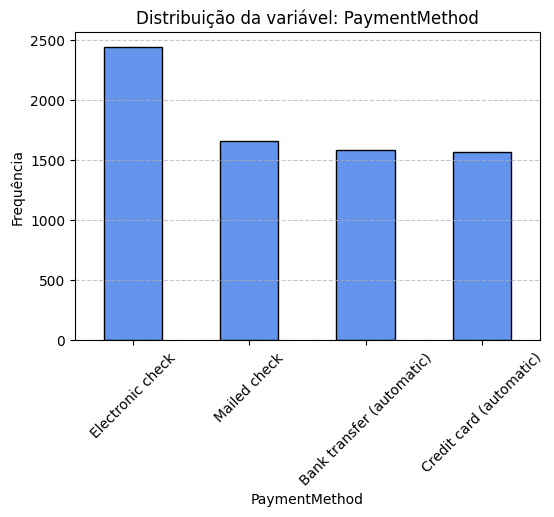

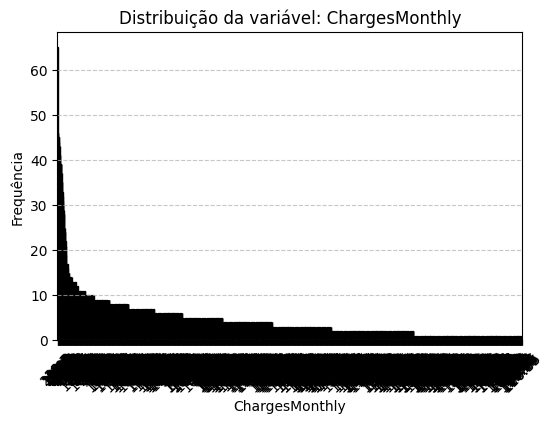

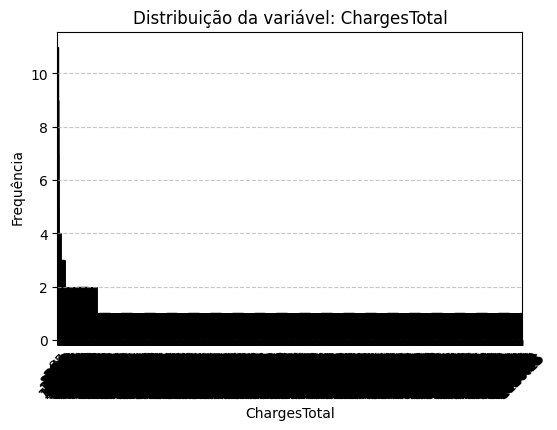

In [ ]:
# Percorrendo cada coluna e gerando um gráfico de barras
for coluna in df.columns:
    plt.figure(figsize=(6, 4))  # Define o tamanho do gráfico
    df[coluna].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')

    plt.title(f'Distribuição da variável: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona grade no eixo Y

    plt.show()  # Exibe o gráfico

# Entendendo Dados

## Tipos de Dados

Senior Citizen, uma categórica, está como inteiro (ok).

Tenure (tempo de contrato), está como inteiro (correto).

Charges Monthly (total da conta por Mês) está como float, (correto).

Charges Total (total gasto pelo cliente em todo contrato) está como objeto (errado)

Todas as outras variáveis estão como objeto e são algum tipo de variável categórica.

## Verificando Integridade dos Dados

Não há dados nulos ou faltantes. Porém, a variável Churn possui algumas contagems com rótulo vazio. Preciso verificar isso.

Algumas variáveis possuem dois tipos de sinalização para "não". "No" e "No phone service" ou "No Internet Service". Preciso alterar isso.

## Distribuição dos Dados

Algumas variáveis estão com a distribuição muito desigual como Churn, SeniorCitizen e Dependents. Isso pode afetar o aprendizado do modelo de previsão.

A variável Ternure mostra uma contagem alta de clientes com poucos meses de contrato.


# Limpeza

1. Entender e tratar as contagens vazias da variável Churn

# Transformações

1. Transformar Variável Multiple Lines o "No phone service" para "No".
2. Transformar Variáveis "OnlineSecurity", "OnlineBackUp", "DeviceProtection", "TechSupport", "StreamingTV" e "StreamingMovies" de "No internet services" para "No".
1. Transformar Charges Total em float.
2. Separar variáveis categóricas das numéricas.
3. Fazer a codificação das Variáveis Categóricas.

In [10]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [11]:
df_churn = df[df['Churn'] == '']
df_churn.head()

,ID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


# Investigação e Limpeza Churn

Realmente temos valores vazios no churn. Como ela será a variável target na criação do modelo, precisamos remover os valores vazios.

Vou transformar em valores nulos para remover as linhas.

In [12]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [13]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

# Transformações

- Transformar Variável Multiple Lines o "No phone service" para "No".
- Transformar Variáveis "OnlineSecurity", "OnlineBackUp", "DeviceProtection", "TechSupport", "StreamingTV" e "StreamingMovies" de "No internet services" para "No".
- Transformar Charges Total em float.
- Separar variáveis categóricas das numéricas.
- Fazer a codificação das Variáveis Categóricas.

In [17]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [18]:
for coluna in df.columns:
    valores_unicos = df[coluna].unique()  # Obtém os valores únicos
    print(f"Coluna: {coluna}")
    print(f"Valores únicos: {valores_unicos}\n")

Coluna: ID
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
Valores únicos: ['No' 'Yes']

Coluna: gender
Valores únicos: ['Female' 'Male']

Coluna: SeniorCitizen
Valores únicos: [0 1]

Coluna: Partner
Valores únicos: ['Yes' 'No']

Coluna: Dependents
Valores únicos: ['Yes' 'No']

Coluna: tenure
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Coluna: PhoneService
Valores únicos: ['Yes' 'No']

Coluna: MultipleLines
Valores únicos: ['No' 'Yes']

Coluna: InternetService
Valores únicos: ['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
Valores únicos: ['No' 'Yes']

Coluna: OnlineBackup
Valores únicos: ['Yes' 'No']

Coluna: DeviceProtection
Valores únicos: ['No' 'Yes']

Coluna: TechSupport
Valores únicos: ['Yes' 'No']

Coluna: Streaming

In [19]:
df['ChargesTotal'] = df['ChargesTotal'].astype(float)
df.info()

# Parece que temos algum valor na coluna que está como string. Por isso foi identificado como object.

ValueError: could not convert string to float: ' '

In [20]:
# Criar uma máscara para identificar valores inválidos
mask = pd.to_numeric(df['ChargesTotal'], errors='coerce').isna()

# Exibir as linhas problemáticas
df_problematicos = df[mask]
print(df_problematicos)


              ID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService MultipleLines InternetService  ... OnlineBackup  \
975            No 

In [21]:
valores_invalidos = df.loc[mask, 'ChargesTotal'].unique()
print("Valores problemáticos encontrados:", valores_invalidos)


Valores problemáticos encontrados: [' ']


In [22]:
df['ChargesTotal'] = pd.to_numeric(df['ChargesTotal'], errors='coerce')  # Converte para float, substituindo erros por NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [23]:
df.dropna()

,ID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [24]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [25]:
# Verificando IDs duplicados para indexar
df['ID'].duplicated().value_counts()

,count
ID,
False,7032


In [26]:
df.set_index('ID', inplace=True)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
ID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


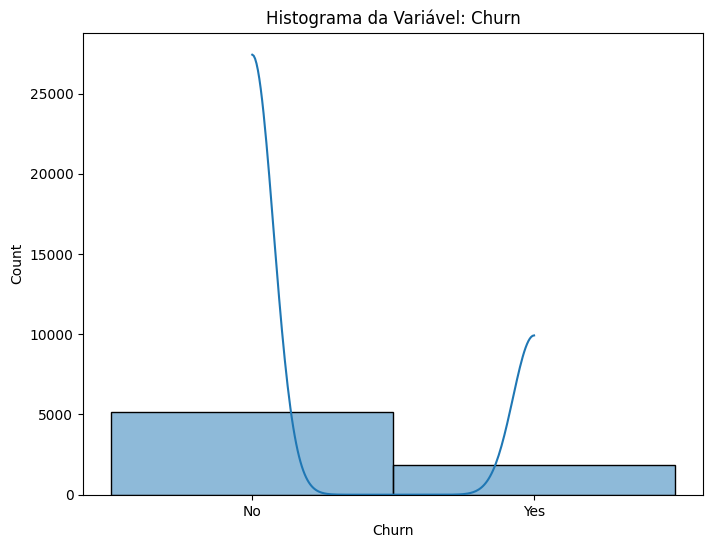

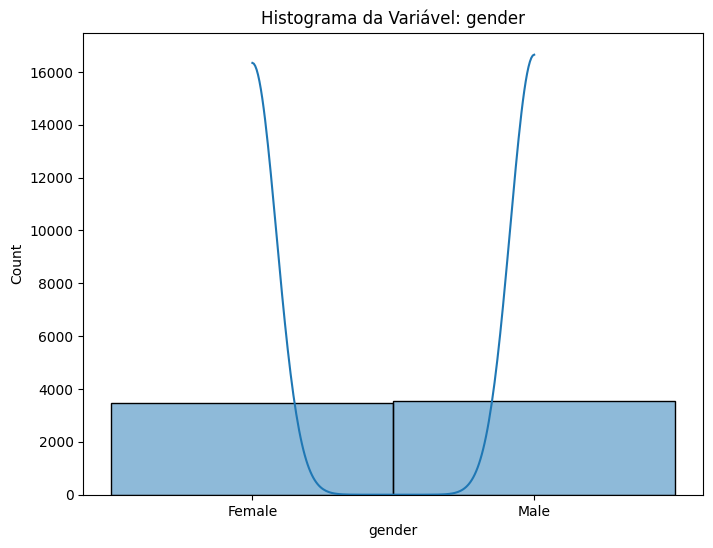

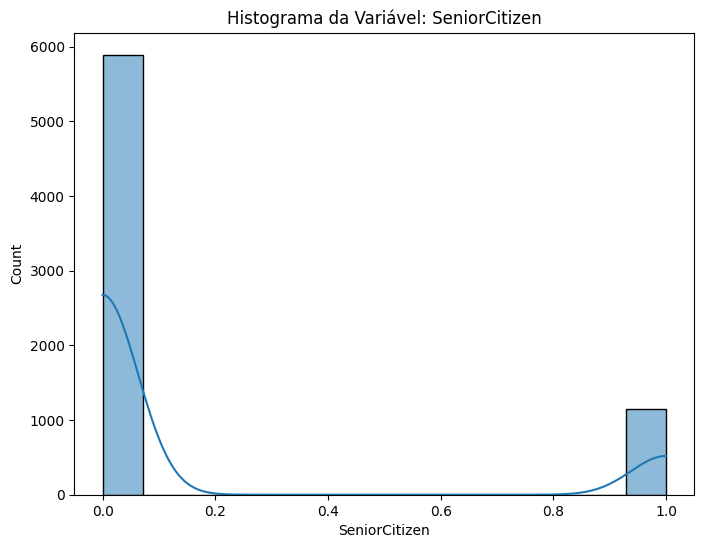

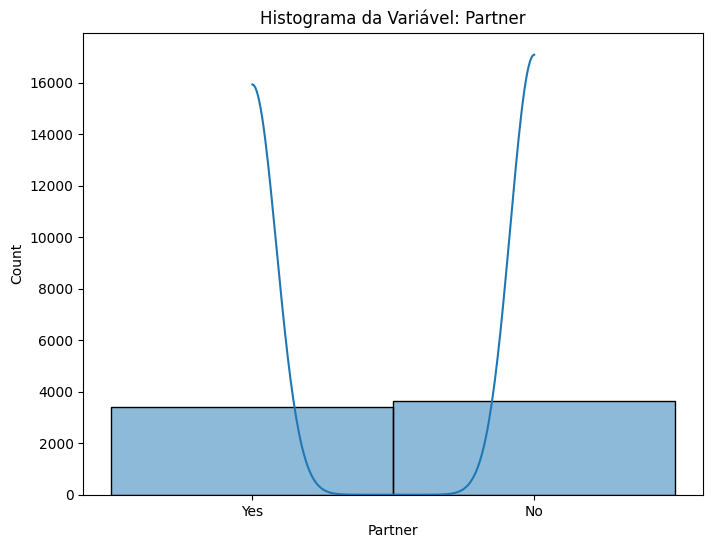

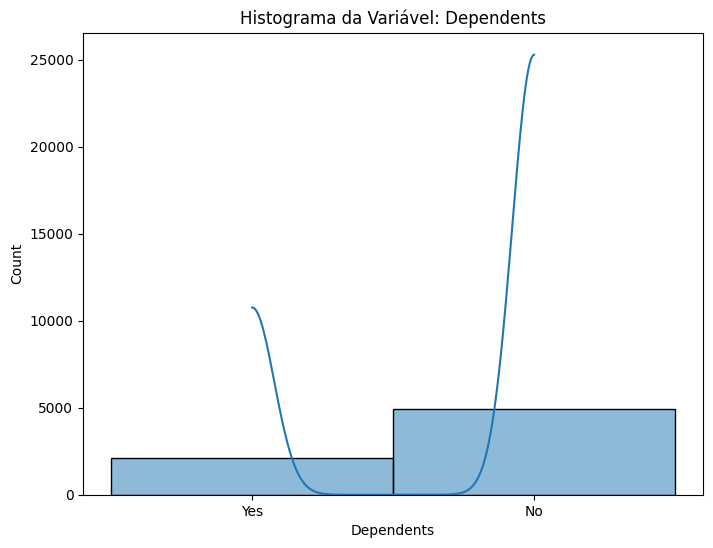

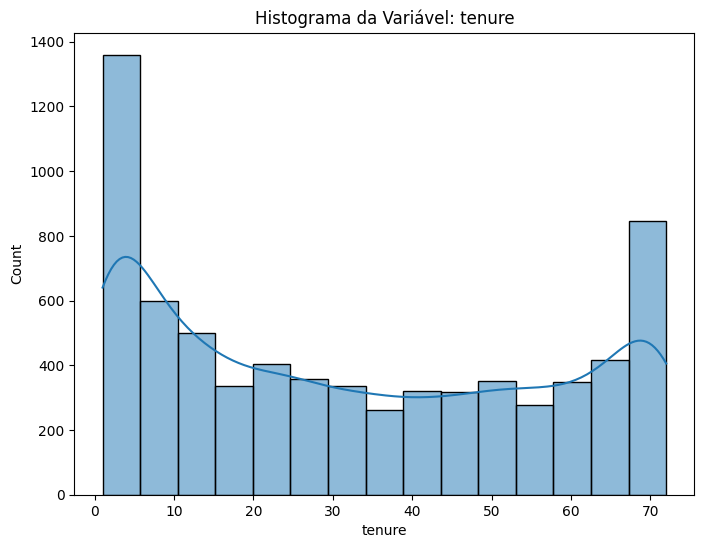

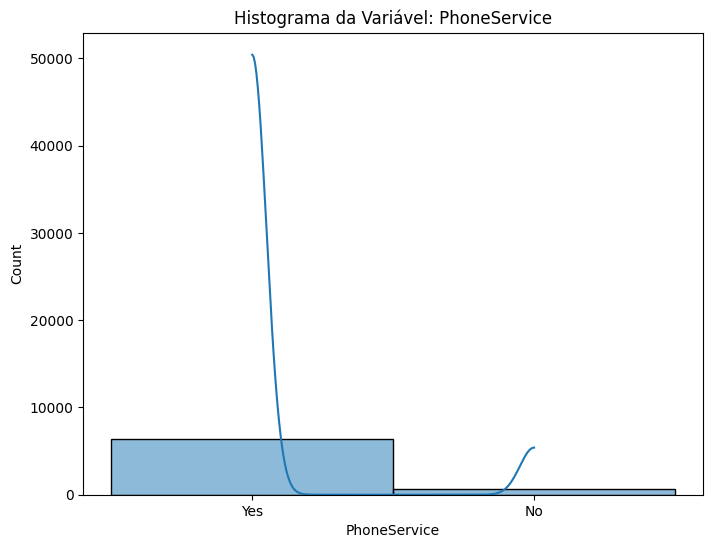

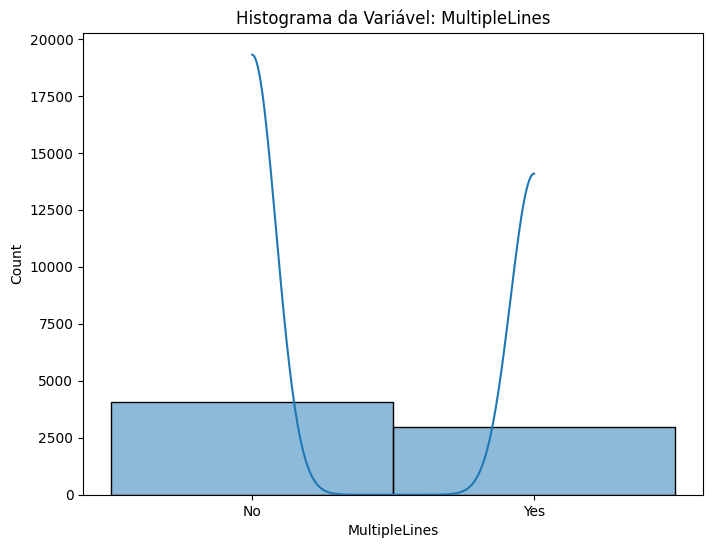

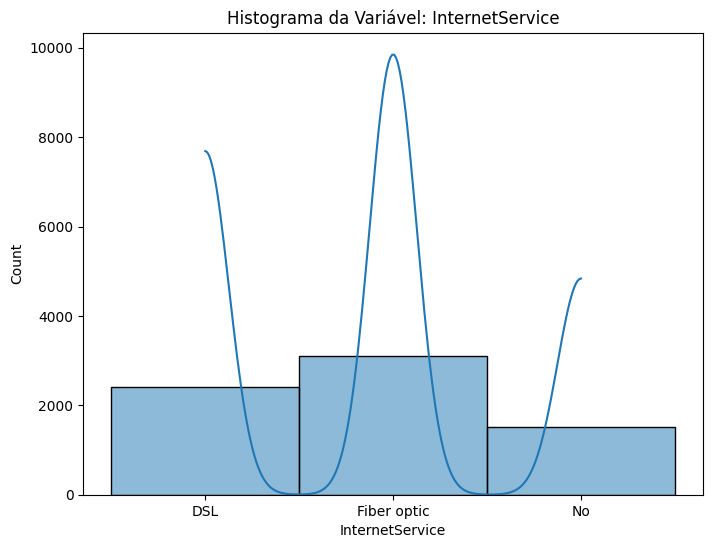

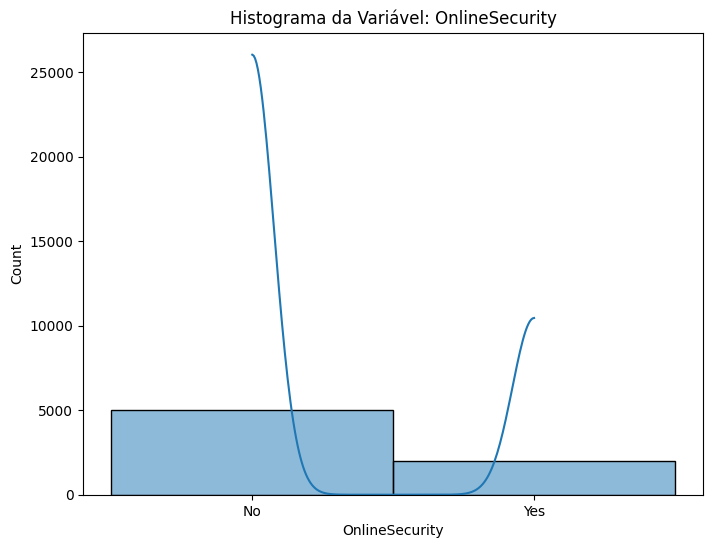

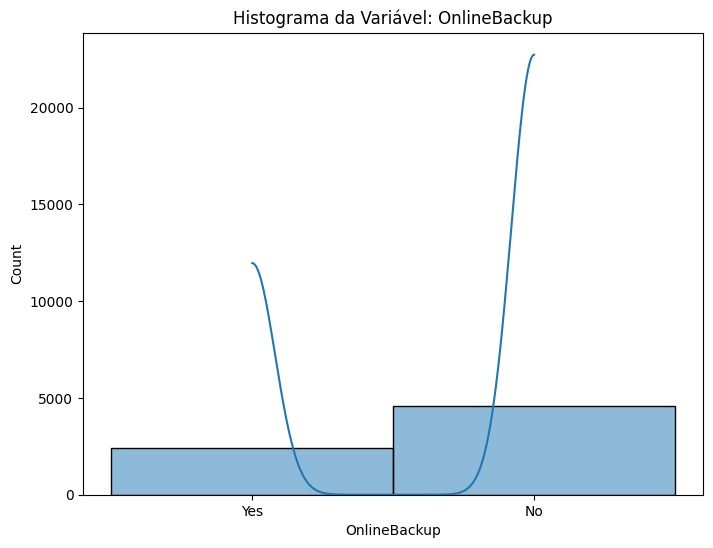

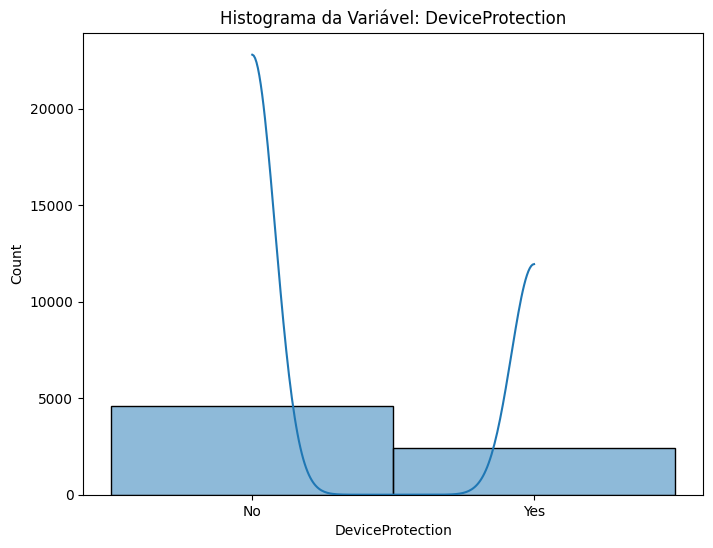

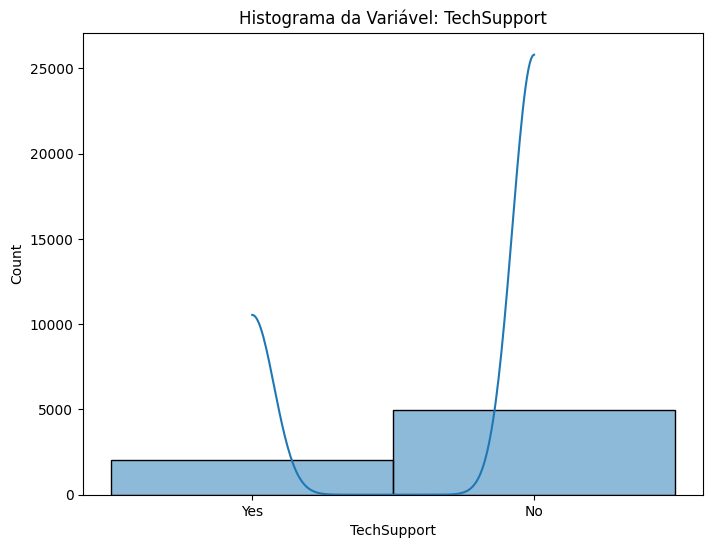

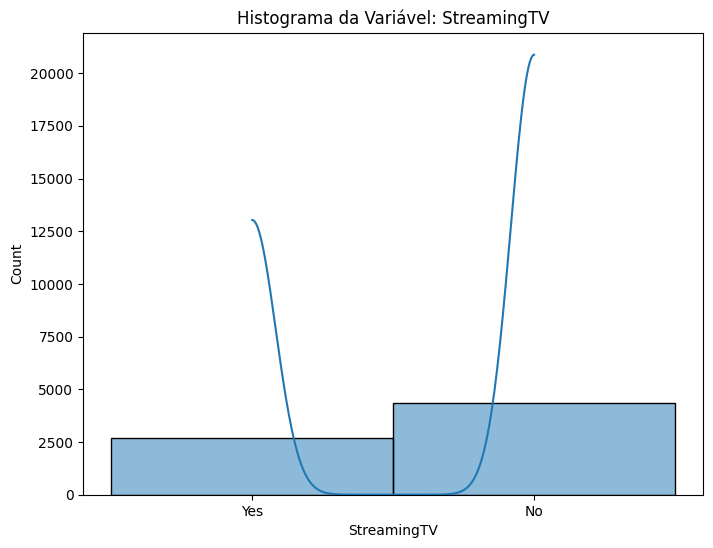

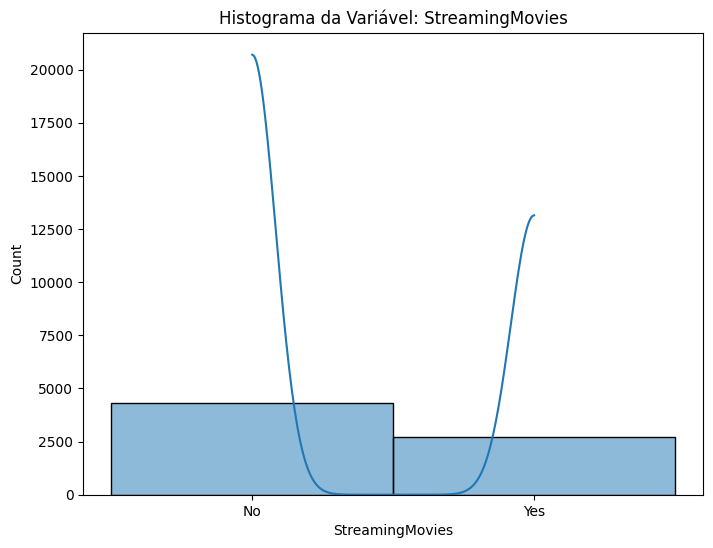

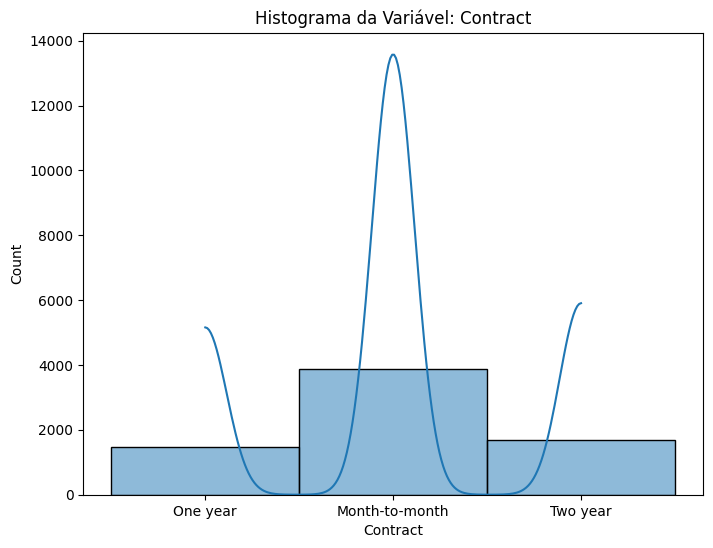

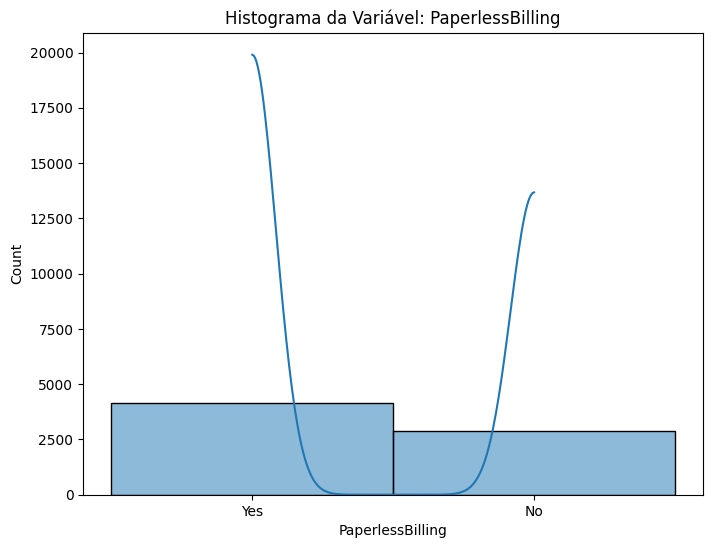

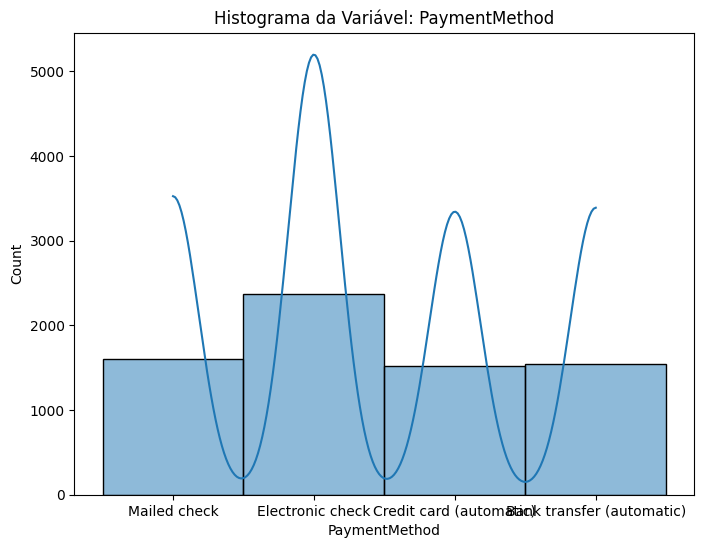

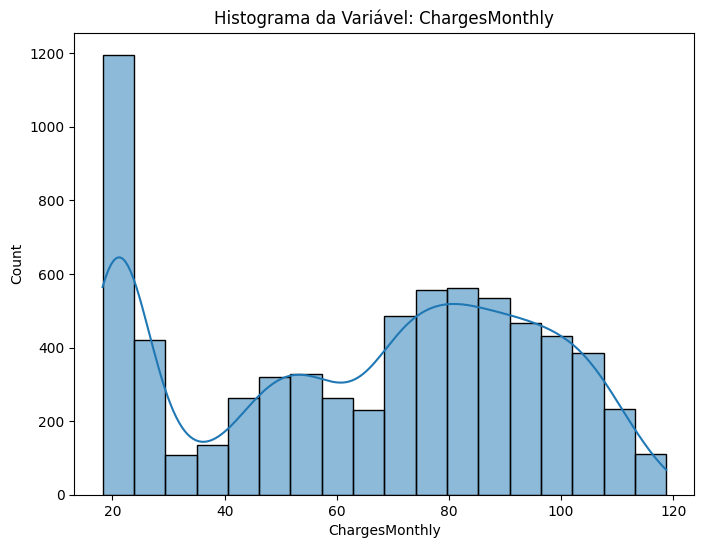

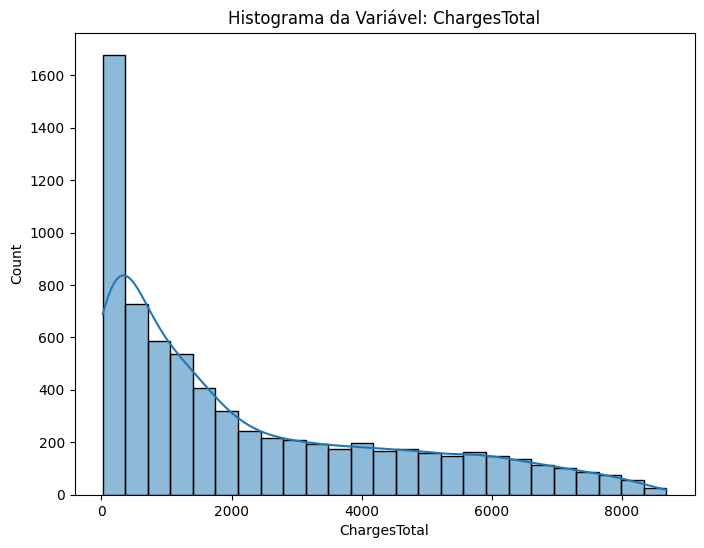

In [52]:
for coluna in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=coluna, kde=True)
    plt.title(f'Histograma da Variável: {coluna}')
    plt.xlabel(coluna)

<Figure size 800x600 with 0 Axes>

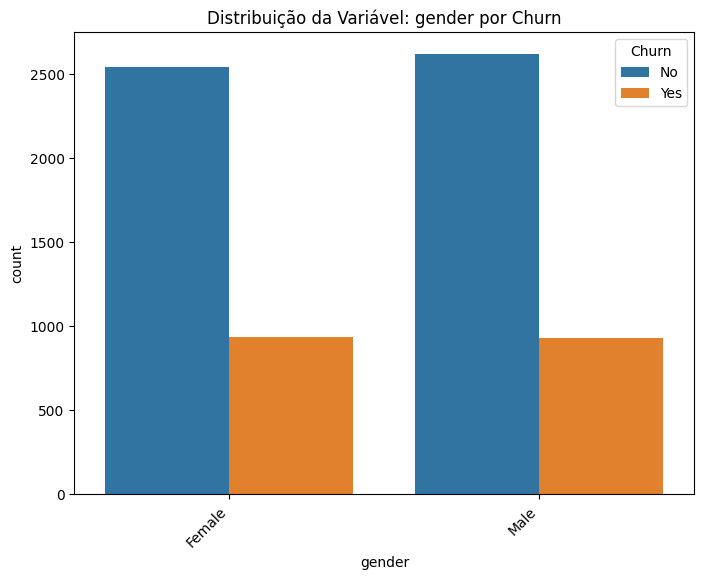

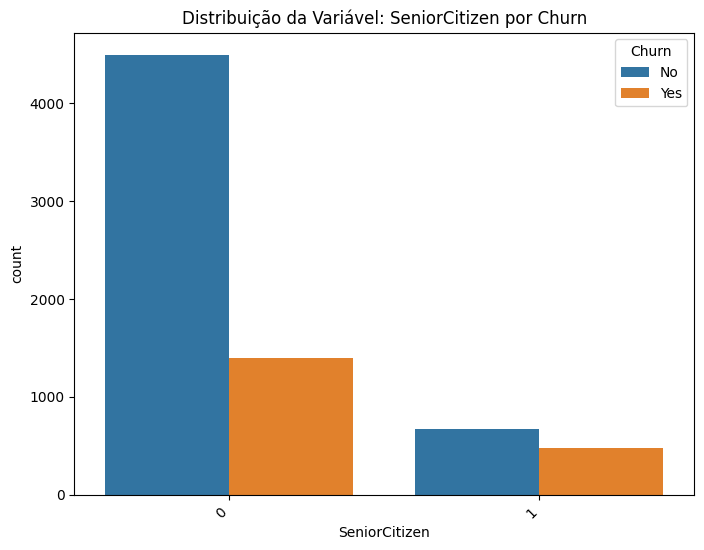

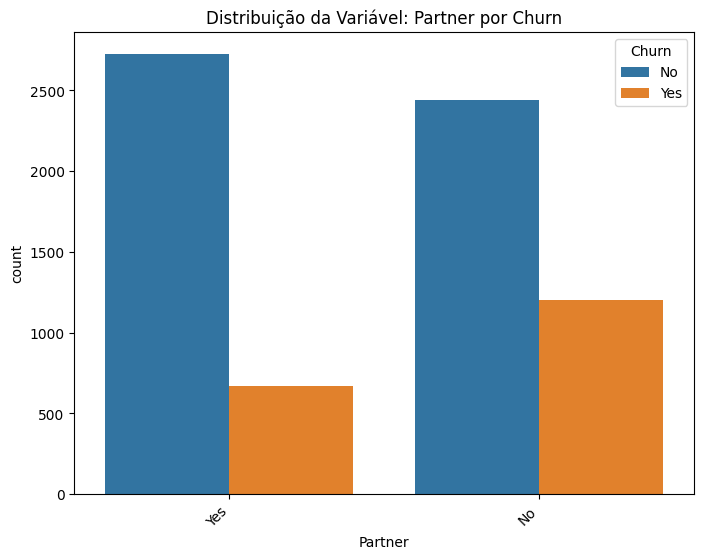

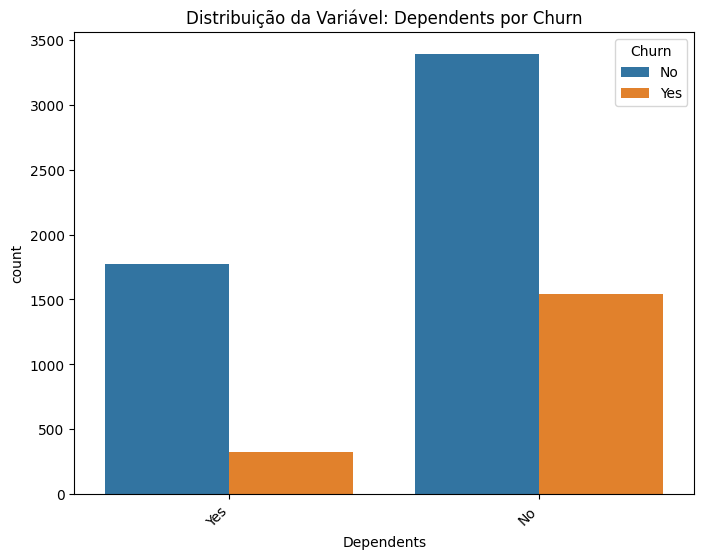

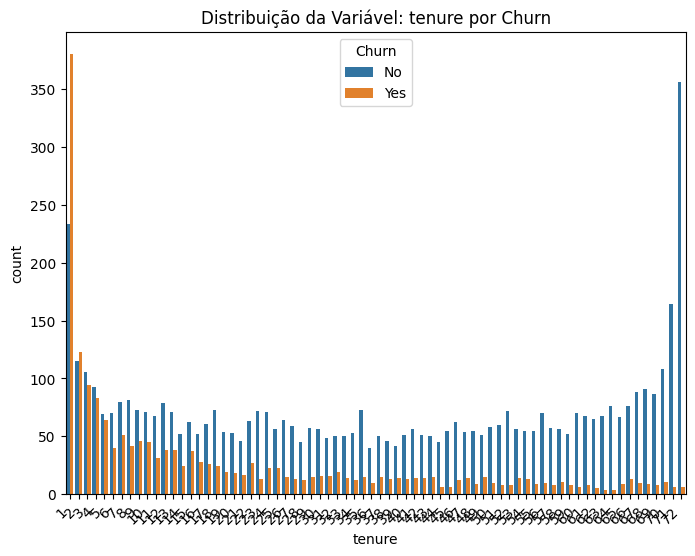

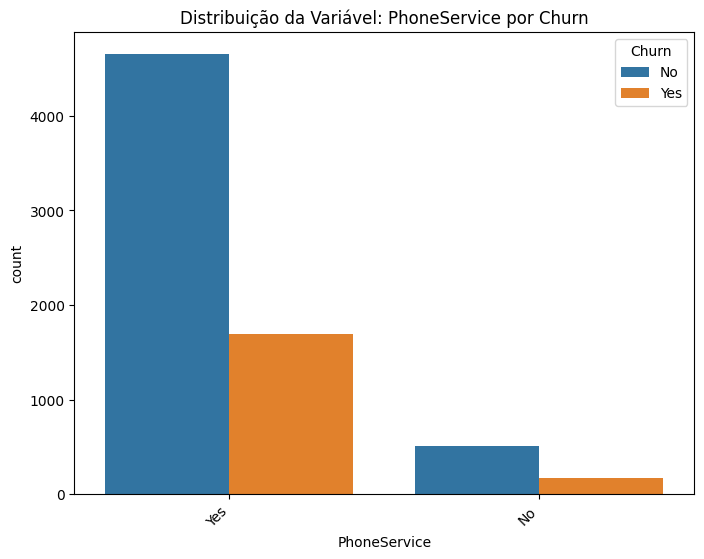

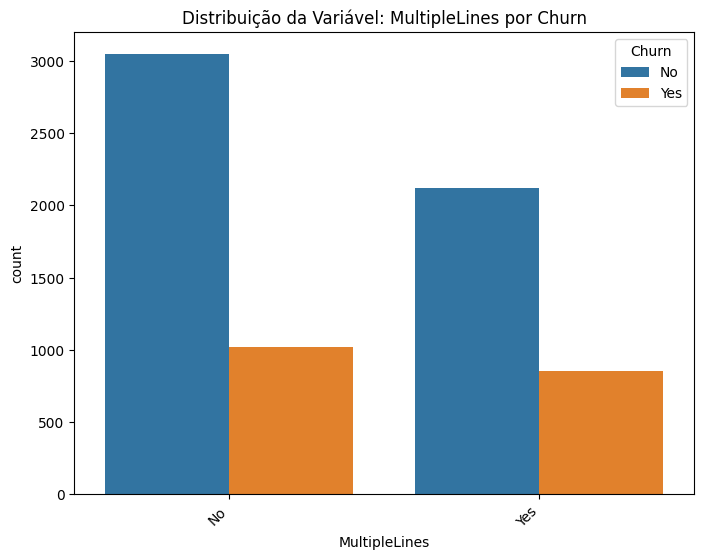

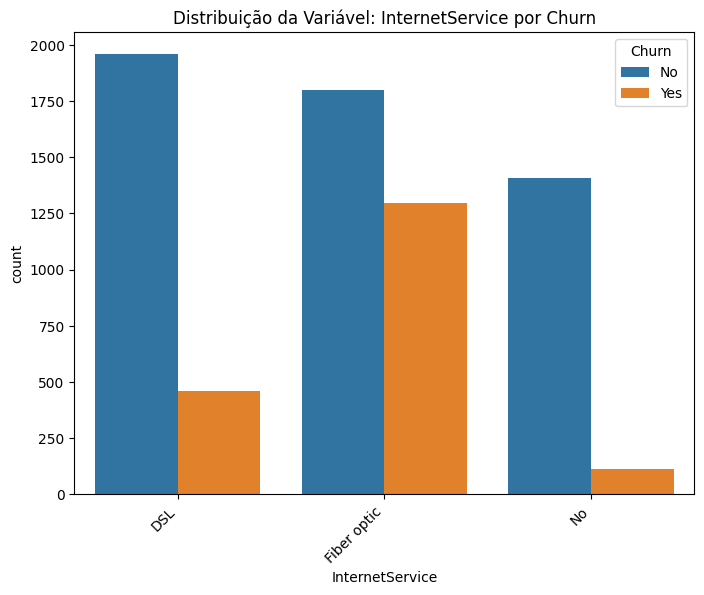

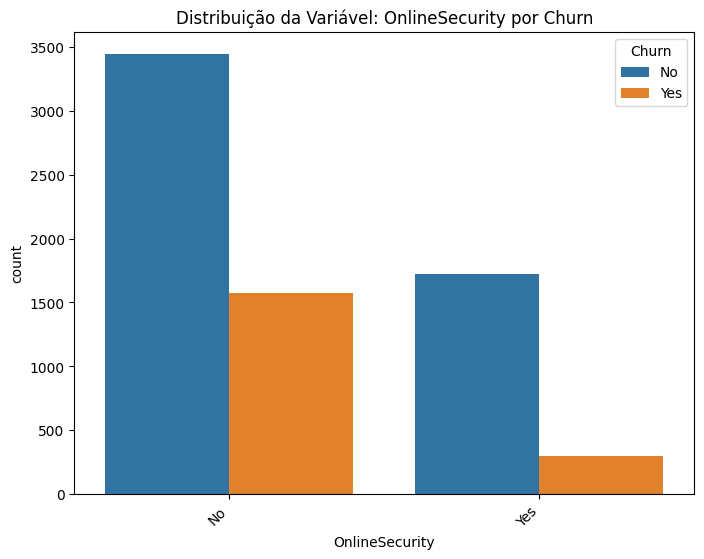

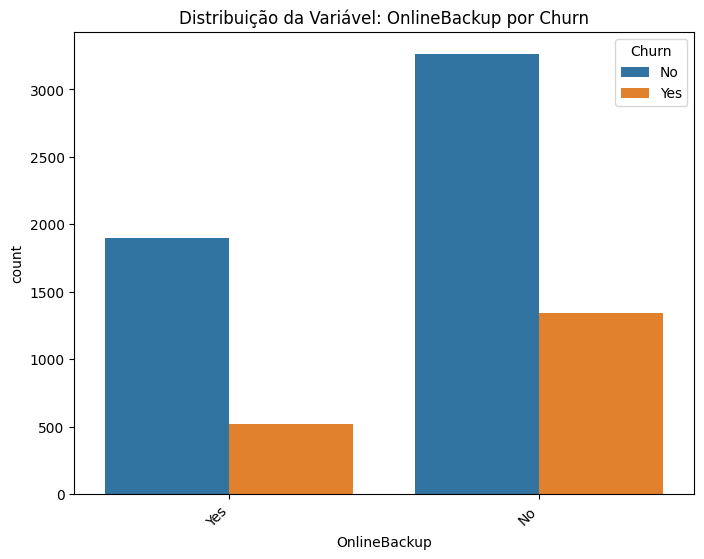

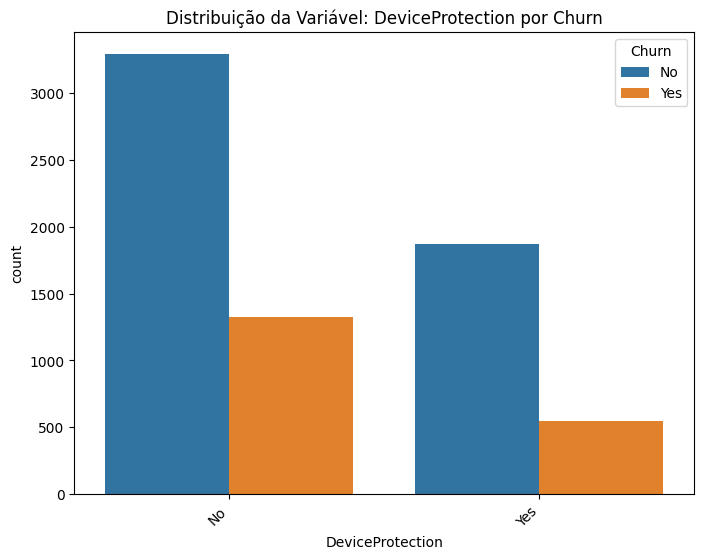

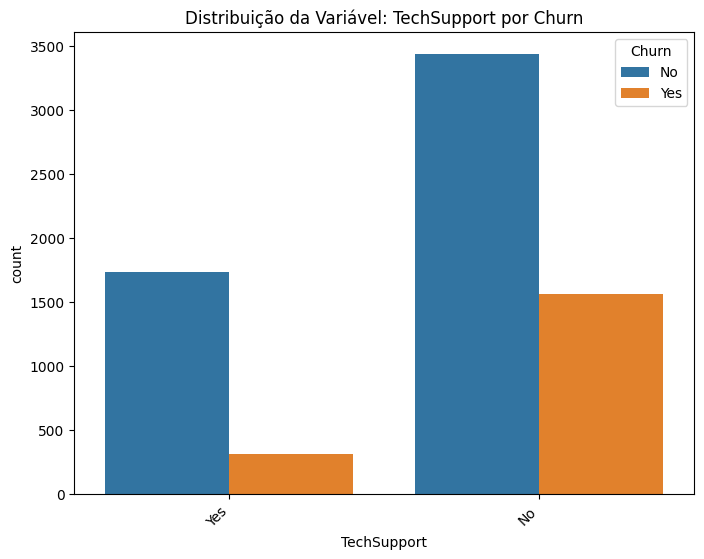

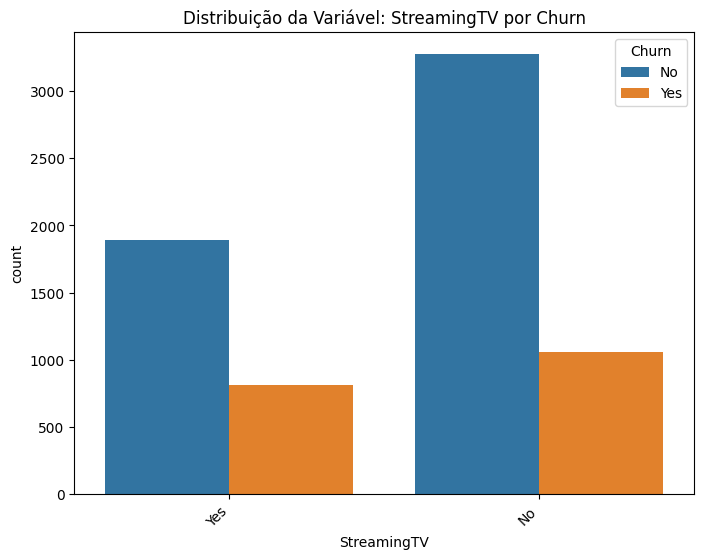

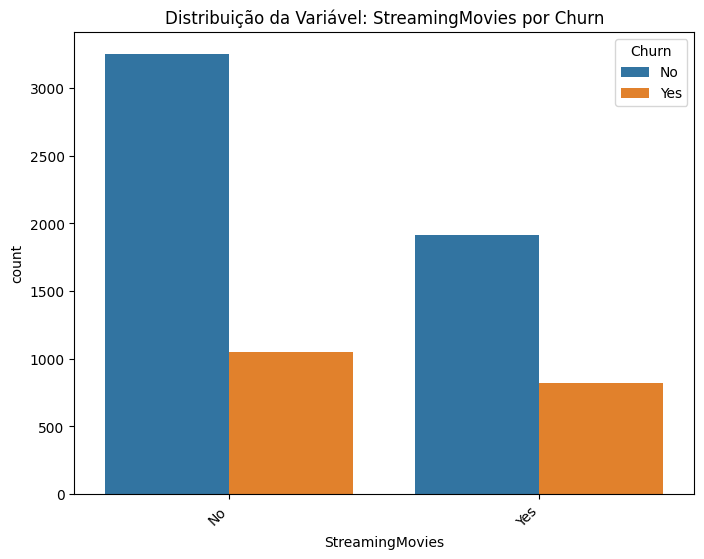

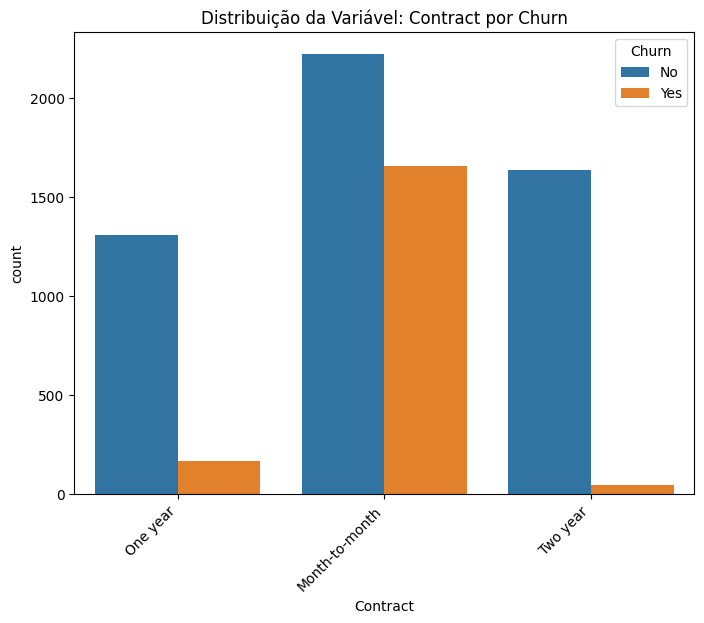

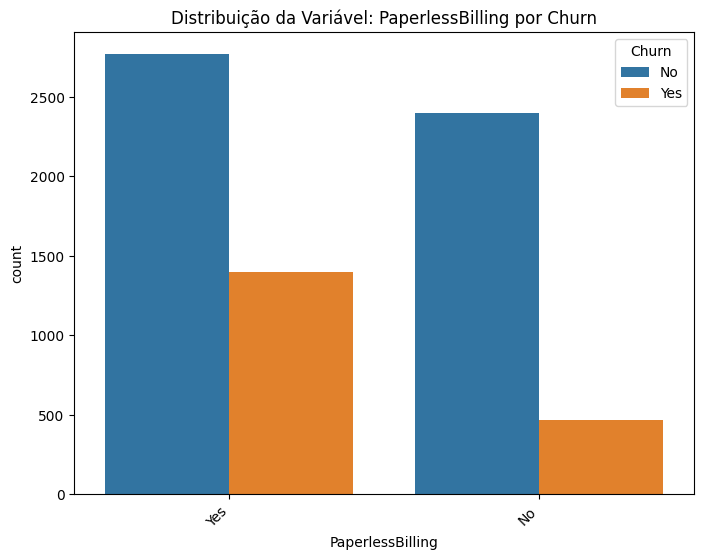

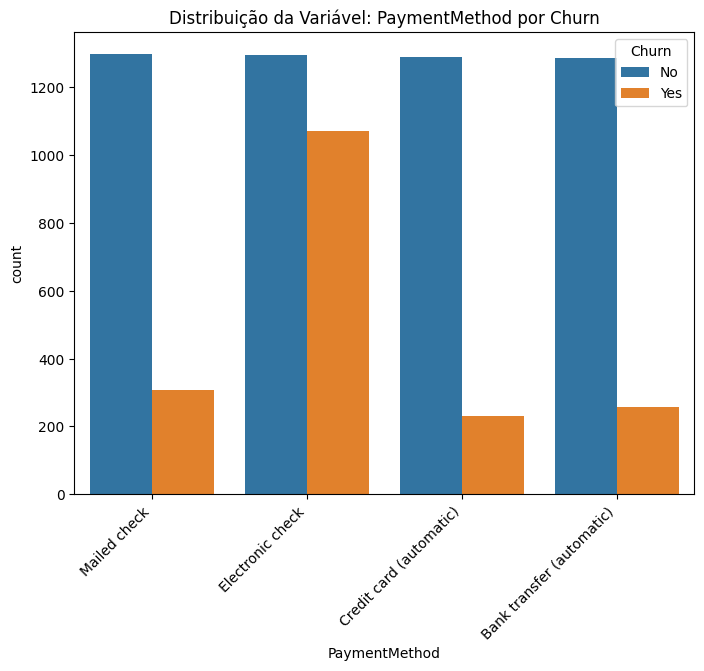

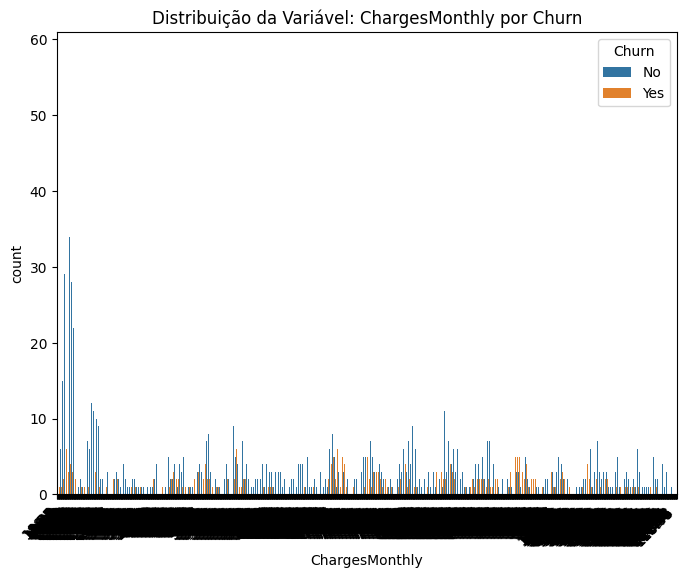

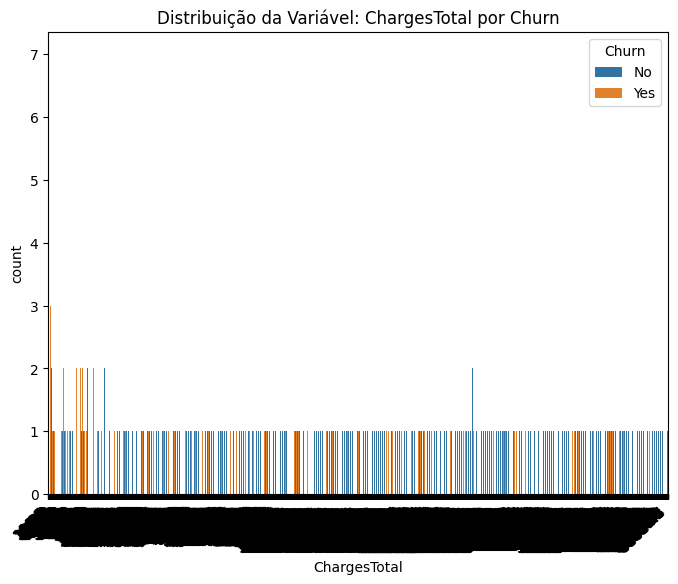

In [59]:
for coluna in df.columns:
    plt.figure(figsize=(8, 6))
    if coluna == 'Churn':
        continue
    else:
        sns.countplot(data=df, x=coluna, hue='Churn')
        plt.title(f'Distribuição da Variável: {coluna} por Churn')
    plt.xlabel(coluna)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Conclusões das Análises dos Gráficos de Distribuição


## Distribuições Desiguais:

- Temos um número muito mais alto de contagens para Não Churn que Sim Churn
- Senioridade está desigual, poucos clientes idosos.
- Dependentes está desigual
- Acúmulo de Tempo de contrato nos valores mais baixos
- PhoneService
- Online Security
- Online Backup
- Device Protection
- TechSupport
- StreamingTV
- StreamingMovies
- Acúmulo de ChargesMonthly e Total nas faixas menores, o que faz sentido pro ChargesTotal já que temos um número de clientes com poucos meses de contrato. Mas ChargesMonthly indica que temos um grande número de clientes com ticket baixo.

## Distribuições Iguais:
- A distribuiçõa de Gênero está equivalente.
- Parceiros está igual.
- Linhas Múltiplas
- InternetService
- Contract
- Paperless Billing
- Payment Method

# Hipóteses Até agora

- Entre homens e mulheres não vemos um padrão maior de churn por gênero.
- Entre os idosos, vemos uma taxa de cancelamento muito alta.
- Clientes que não possuem parceiros tendem a cancelar em torno de 2x mais.
- Existem mais clientes sem dependentes, porém os clientes com dependentes possuem uma taxa de cancelamento significativamente menor.
- A contagem alta de Churns em clientes com poucos meses de contrato demonstra uma taxa de cancelamento alta para os primeiros meses de contratação.
- Existe um número muito superior de clientes com contratação de serviços telefônicos, porém a taxa de churn aparenta estar proporcionalmente igual.
- Temos mais clientes SEM múltiplas linhas, mas a taxa de churn para os que tem é significativamente maior.
- A taxa de cancelamento para clientes com serviço de internet por fibra ótica extremamente alta, beirando os 50%. O que indica possível problema com o tipo de serviço.
- Temos mais clientes sem segurança online e com maior taxa de cancelamento do que aqueles que TEM segurança online.
- Mais clientes sem backup online, com uma taxa de cancelamento ligeiramente menor para aqueles que possuem backup online.
- O mesmo acontece para os clientes que possuem proteção de dispositivos.
- Clientes com suporte técnico tem uma taxa de churn 2x menor.
- Clientes sem StreamingTV possuem taxa de cancelamento menor, indicando possível problema com o tipo de serviço.
- O mesmo acontece para clientes sem StreamingMovies.
- Clientes com contrato mês a mês tem um Churn muito alto, em torno de 40%.
- Clientes com faturamento sem papel cancelam muito mais.
- Clientes que pagam com cheque eletrônico cancelam em torno de 40%.
- Não parece haver um padrão de churn em relação ao preço mensal.
- Distribuições desiguais podem fazer ser necessário utilizar uma reamostragem dos dados para evitar enviesamento do modelo. Utilizar outras métricas além de Acurácia, como F1-score, Recall e ROC-AUC.

# Desafios Extras
- Traduzir Colunas
- Criar Coluna de Conta Diária

Por aprendizado e querer colocar em prática a integração com API da OpenAI, vou fazer a tradução utilizando modelos de IA.

In [29]:
# Configurando API Key
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

In [30]:
def obter_resposta_gpt(nome,modelo="gpt-4o",client=client,persona=None):

    prompt = f"""
    Abaixo temos o nome de uma coluna em um dataset. Sua tarefa consiste em traduzir o nome para o Português Brasileiro, que será o novo nome da coluna, e deverá obedecer:
    - sem acentos,
    - utilizando '_' no lugar de espaços,
    - Primeira letra de cada palavra em Maiúsculo,
    - Preserve termos em inglês que sejam utilizados em português, como exemplo 'Streaming'.

    Termo:
    '''{nome}'''

    Observação: Mantenha a formatação de escrita do termo. Retorne apenas o nome da coluna traduzido.
    """

    if persona:
        messages_arg = [
            {"role": "assistant", "content": persona},
            {"role": "user", "content": prompt}
        ]
    else:
        messages_arg = [{"role": "user", "content": prompt}]

    resposta = client.chat.completions.create(
        model=modelo,
        messages=messages_arg,
        temperature=0
    )

    # Extraindo o texto da resposta
    conteudo_resposta = resposta.choices[0].message.content

    return conteudo_resposta

In [31]:
# Testando Função API
resposta = obter_resposta_gpt("StreamingTV")
print(resposta)

Streaming_Tv


In [32]:
# Preservando DF
df_manipulacao = df.copy()

In [33]:
novos_nomes = {}

for coluna in df.columns:
    traducao = obter_resposta_gpt(coluna)
    novos_nomes[coluna] = traducao.title()
    print(f"Traduzido '{coluna}' por '{traducao}'\n")

df_manipulacao.rename(columns=novos_nomes, inplace=True)

print(df_manipulacao.head())

Traduzido 'Churn' por 'Cancelamento'

Traduzido 'gender' por 'Genero'

Traduzido 'SeniorCitizen' por 'Idoso'

Traduzido 'Partner' por 'Parceiro'

Traduzido 'Dependents' por 'Dependentes'

Traduzido 'tenure' por 'Tempo_De_Contrato'

Traduzido 'PhoneService' por 'Servico_Telefone'

Traduzido 'MultipleLines' por 'Multiplas_Linhas'

Traduzido 'InternetService' por 'Servico_Internet'

Traduzido 'OnlineSecurity' por 'Seguranca_Online'

Traduzido 'OnlineBackup' por 'Backup_Online'

Traduzido 'DeviceProtection' por 'Protecao_Dispositivo'

Traduzido 'TechSupport' por 'Suporte_Tecnico'

Traduzido 'StreamingTV' por 'Streaming_Tv'

Traduzido 'StreamingMovies' por 'Filmes_Streaming'

Traduzido 'Contract' por 'Tipo_De_Contrato'

Traduzido 'PaperlessBilling' por 'Faturamento_Sem_Papel'

Traduzido 'PaymentMethod' por 'Metodo_De_Pagamento'

Traduzido 'ChargesMonthly' por 'Cobrancas_Mensais'

Traduzido 'ChargesTotal' por 'Cobrancas_Totais'

           Cancelamento  Genero  Idoso Parceiro Dependentes  \


# Criar Coluna de Conta Diária

In [34]:
df_manipulacao['Cobrancas_Diarias'] = (df_manipulacao['Cobrancas_Mensais'] / 30).round(2)
df_manipulacao.head()

,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Tempo_De_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_Tv,Filmes_Streaming,Tipo_De_Contrato,Faturamento_Sem_Papel,Metodo_De_Pagamento,Cobrancas_Mensais,Cobrancas_Totais,Cobrancas_Diarias
ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


# Separa em Categóricas e Numéricas

In [35]:
df_numericas = df_manipulacao[['Tempo_De_Contrato', 'Cobrancas_Mensais', 'Cobrancas_Totais', 'Cobrancas_Diarias']]
df_categoricas = df_manipulacao.drop(columns=['Tempo_De_Contrato', 'Cobrancas_Mensais', 'Cobrancas_Totais', 'Cobrancas_Diarias'])

In [36]:
df_numericas.head()

,Tempo_De_Contrato,Cobrancas_Mensais,Cobrancas_Totais,Cobrancas_Diarias
ID,,,,
0002-ORFBO,9,65.6,593.30,2.19
0003-MKNFE,9,59.9,542.40,2.00
0004-TLHLJ,4,73.9,280.85,2.46
0011-IGKFF,13,98.0,1237.85,3.27
0013-EXCHZ,3,83.9,267.40,2.80


In [37]:
df_categoricas.head()

,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_Tv,Filmes_Streaming,Tipo_De_Contrato,Faturamento_Sem_Papel,Metodo_De_Pagamento
ID,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
0003-MKNFE,No,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
0004-TLHLJ,Yes,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
0011-IGKFF,Yes,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
0013-EXCHZ,Yes,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


# Fazer Codificação das Variáveis Categóricas

Como o objetivo é fazer a previsão de churn, vamos utilizar Árvores de Decisão para isso. Então não vamos ter problemas com label encoding.

In [38]:
encoder = LabelEncoder()

for coluna in df_categoricas.columns:
    df_categoricas[coluna] = encoder.fit_transform(df_categoricas[coluna])

df_categoricas.head()

,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_Tv,Filmes_Streaming,Tipo_De_Contrato,Faturamento_Sem_Papel,Metodo_De_Pagamento
ID,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,0,1,1,1,0,0,0,1,0,1,1,0,1,1,3
0003-MKNFE,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,3
0004-TLHLJ,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,2
0011-IGKFF,1,1,1,1,0,1,0,1,0,1,1,0,1,1,0,1,2
0013-EXCHZ,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,3


In [39]:
df_final = pd.merge(df_numericas, df_categoricas, on = 'ID', how = 'inner')
df_final.head()

,Tempo_De_Contrato,Cobrancas_Mensais,Cobrancas_Totais,Cobrancas_Diarias,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Servico_Telefone,...,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_Tv,Filmes_Streaming,Tipo_De_Contrato,Faturamento_Sem_Papel,Metodo_De_Pagamento
ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,9,65.6,593.30,2.19,0,0,0,1,1,1,...,0,0,1,0,1,1,0,1,1,3
0003-MKNFE,9,59.9,542.40,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
0004-TLHLJ,4,73.9,280.85,2.46,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,2
0011-IGKFF,13,98.0,1237.85,3.27,1,1,1,1,0,1,...,1,0,1,1,0,1,1,0,1,2
0013-EXCHZ,3,83.9,267.40,2.80,1,0,1,1,0,1,...,1,0,0,0,1,1,0,0,1,3


# Data Frame Final

Agora que temos o df final e transformado, podemos focar mais nas análises dos dados em si do que na integridade e formato dos dados.

1. Relembrar as informações gerais do dataset.
2. Verificar a Distribuição das variáveis
3. Analisar outliers
4. Analisar a variável target (Churn - Cancelamento)
5. Correlação entre variáveis
6. Relação das Variáveis com a variável target.


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tempo_De_Contrato      7032 non-null   int64  
 1   Cobrancas_Mensais      7032 non-null   float64
 2   Cobrancas_Totais       7032 non-null   float64
 3   Cobrancas_Diarias      7032 non-null   float64
 4   Cancelamento           7032 non-null   int64  
 5   Genero                 7032 non-null   int64  
 6   Idoso                  7032 non-null   int64  
 7   Parceiro               7032 non-null   int64  
 8   Dependentes            7032 non-null   int64  
 9   Servico_Telefone       7032 non-null   int64  
 10  Multiplas_Linhas       7032 non-null   int64  
 11  Servico_Internet       7032 non-null   int64  
 12  Seguranca_Online       7032 non-null   int64  
 13  Backup_Online          7032 non-null   int64  
 14  Protecao_Dispositivo   7032 non-null   int64  

In [45]:
df_final.shape

(7032, 21)

In [40]:
df_final.describe()

,Tempo_De_Contrato,Cobrancas_Mensais,Cobrancas_Totais,Cobrancas_Diarias,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Servico_Telefone,...,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_Tv,Filmes_Streaming,Tipo_De_Contrato,Faturamento_Sem_Papel,Metodo_De_Pagamento
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891,0.265785,0.504693,0.162400,0.482509,0.298493,0.903299,...,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237
std,24.545260,30.085974,2266.771362,1.002955,0.441782,0.500014,0.368844,0.499729,0.457629,0.295571,...,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504
min,1.000000,18.250000,18.800000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,1.187500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,29.000000,70.350000,1397.475000,2.340000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,55.000000,89.862500,3794.737500,2.992500,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,72.000000,118.750000,8684.800000,3.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


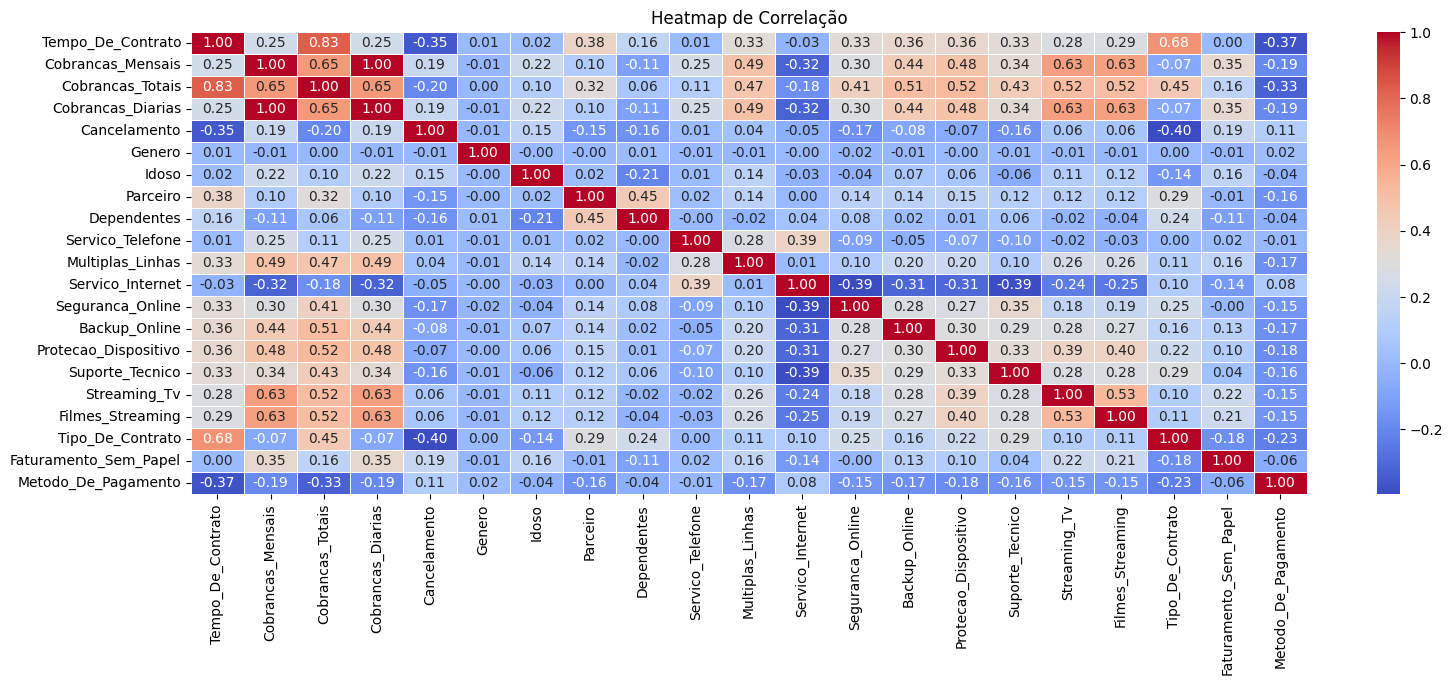

In [ ]:
correlacao = df_final.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap de Correlação")
plt.show()

# Resumo Desta Etapa

1. Extraímos os Dados
2. Criamos o DataFrame
3. Exploramos os dados e identificamos tamanho, variáveis, tipos de dados, valores faltantes.
4. Corrigimos os valores faltantes e removemos, ajustamos os nomes das colunas, fizemos uma investigação inicial da distribuição dos dados.
5. Investigamos melhor a distribuição dos dados e procuramos padrões entre as distribuições da variável target com as variáveis independentes.
6. Levantamos hipóteses das análises.
7. Traduzimos os nomes das colunas automaticamente utilizando API da OpenAI (para aprendizado).
8. Criamos a coluna de Cobranças Diária (desafio extra).
9. Separamos o DF em variáveis numéricas e categóricas.
10. Fizemos Encoding das variáveis categóricas utilizando Label Encoder.
11. Unimos as variáveis numéricas com as categóricas após a codificação.
12. Puxamos as informações estatísticas e gerais do data frame para relembrar.
13. Fizemos um Heatmap de correlação entre as variáveis.

# Conclusões das Análises dos Gráficos de Distribuição


## Distribuições Desiguais:

- Temos um número muito mais alto de contagens para Não Churn que Sim Churn
- Senioridade está desigual, poucos clientes idosos.
- Dependentes está desigual
- Acúmulo de Tempo de contrato nos valores mais baixos
- PhoneService
- Online Security
- Online Backup
- Device Protection
- TechSupport
- StreamingTV
- StreamingMovies
- Acúmulo de ChargesMonthly e Total nas faixas menores, o que faz sentido pro ChargesTotal já que temos um número de clientes com poucos meses de contrato. Mas ChargesMonthly indica que temos um grande número de clientes com ticket baixo.

## Distribuições Iguais:
- A distribuiçõa de Gênero está equivalente.
- Parceiros está igual.
- Linhas Múltiplas
- InternetService
- Contract
- Paperless Billing
- Payment Method

## Hipóteses Levantadas

- Entre homens e mulheres não vemos um padrão maior de churn por gênero.
- Entre os idosos, vemos uma taxa de cancelamento muito alta.
- Clientes que não possuem parceiros tendem a cancelar em torno de 2x mais.
- Existem mais clientes sem dependentes, porém os clientes com dependentes possuem uma taxa de cancelamento significativamente menor.
- A contagem alta de Churns em clientes com poucos meses de contrato demonstra uma taxa de cancelamento alta para os primeiros meses de contratação.
- Existe um número muito superior de clientes com contratação de serviços telefônicos, porém a taxa de churn aparenta estar proporcionalmente igual.
- Temos mais clientes SEM múltiplas linhas, mas a taxa de churn para os que tem é significativamente maior.
- A taxa de cancelamento para clientes com serviço de internet por fibra ótica extremamente alta, beirando os 50%. O que indica possível problema com o tipo de serviço.
- Temos mais clientes sem segurança online e com maior taxa de cancelamento do que aqueles que TEM segurança online.
- Mais clientes sem backup online, com uma taxa de cancelamento ligeiramente menor para aqueles que possuem backup online.
- O mesmo acontece para os clientes que possuem proteção de dispositivos.
- Clientes com suporte técnico tem uma taxa de churn 2x menor.
- Clientes sem StreamingTV possuem taxa de cancelamento menor, indicando possível problema com o tipo de serviço.
- O mesmo acontece para clientes sem StreamingMovies.
- Clientes com contrato mês a mês tem um Churn muito alto, em torno de 40%.
- Clientes com faturamento sem papel cancelam muito mais.
- Clientes que pagam com cheque eletrônico cancelam em torno de 40%.
- Não parece haver um padrão de churn em relação ao preço mensal.
- Distribuições desiguais podem fazer ser necessário utilizar uma reamostragem dos dados para evitar enviesamento do modelo. Utilizar outras métricas além de Acurácia, como F1-score, Recall e ROC-AUC.